In [2]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("BMW sales data (2010-2024) (1).csv")

# Pilih kolom relevan untuk clustering
data_cluster = df[['Year', 'Price_USD', 'Engine_Size_L', 'Mileage_KM']].copy()

# Cek data awal
print("Data awal:")
print(data_cluster.head())
print("\nInformasi dataset:")
print(data_cluster.info())


Data awal:
   Year  Price_USD  Engine_Size_L  Mileage_KM
0  2016      98740            3.5      151748
1  2013      79219            1.6      121671
2  2022     113265            4.5       10991
3  2024      60971            1.7       27255
4  2020      49898            2.1      122131

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           50000 non-null  int64  
 1   Price_USD      50000 non-null  int64  
 2   Engine_Size_L  50000 non-null  float64
 3   Mileage_KM     50000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.5 MB
None


In [3]:
# Hapus baris dengan missing value
data_cluster = data_cluster.dropna()

# Standardisasi agar tiap variabel punya skala yang seimbang
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cluster)

# Ubah kembali ke DataFrame untuk kemudahan analisis
scaled_df = pd.DataFrame(scaled_data, columns=data_cluster.columns)

print("\nData setelah standarisasi:")
print(scaled_df.head())



Data setelah standarisasi:
       Year  Price_USD  Engine_Size_L  Mileage_KM
0 -0.234876   0.911817       0.250548    0.887814
1 -0.928611   0.160951      -1.632377    0.368717
2  1.152595   1.470514       1.241561   -1.541504
3  1.615085  -0.540950      -1.533276   -1.260805
4  0.690105  -0.966867      -1.136871    0.376656


In [4]:
# Gunakan metode Ward (paling umum untuk data numerik)
Z = linkage(scaled_df, method='ward')

# Tampilkan struktur linkage (opsional)
print("\nLinkage matrix (5 baris pertama):")
print(Z[:5])



Linkage matrix (5 baris pertama):
[[2.88800000e+03 4.33350000e+04 6.07399535e-04 2.00000000e+00]
 [4.49500000e+03 6.07400000e+03 1.13151128e-03 2.00000000e+00]
 [3.07200000e+04 4.25350000e+04 1.59267156e-03 2.00000000e+00]
 [4.19750000e+04 4.97960000e+04 1.94081066e-03 2.00000000e+00]
 [2.13660000e+04 3.17520000e+04 2.11030954e-03 2.00000000e+00]]


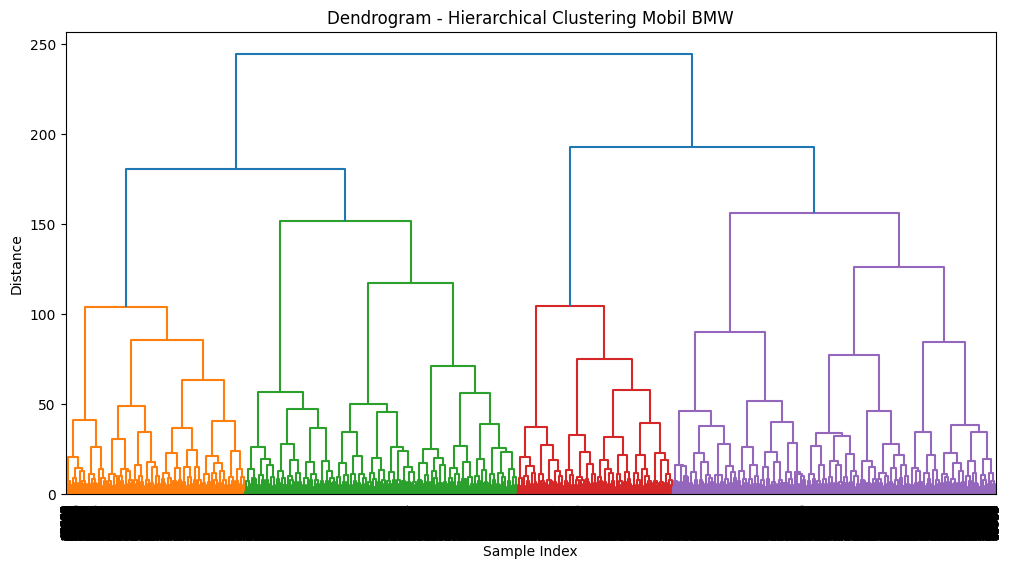

In [8]:
plt.figure(figsize=(12, 6))
plt.title("Dendrogram - Hierarchical Clustering Mobil BMW")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.show()


In [9]:
# Misal kita ingin membuat 4 cluster utama
data_cluster['Cluster'] = fcluster(Z, 4, criterion='maxclust')

# Lihat hasil pengelompokan awal
print("\nData dengan label cluster:")
print(data_cluster.head())



Data dengan label cluster:
   Year  Price_USD  Engine_Size_L  Mileage_KM  Cluster
0  2016      98740            3.5      151748        4
1  2013      79219            1.6      121671        3
2  2022     113265            4.5       10991        2
3  2024      60971            1.7       27255        2
4  2020      49898            2.1      122131        2


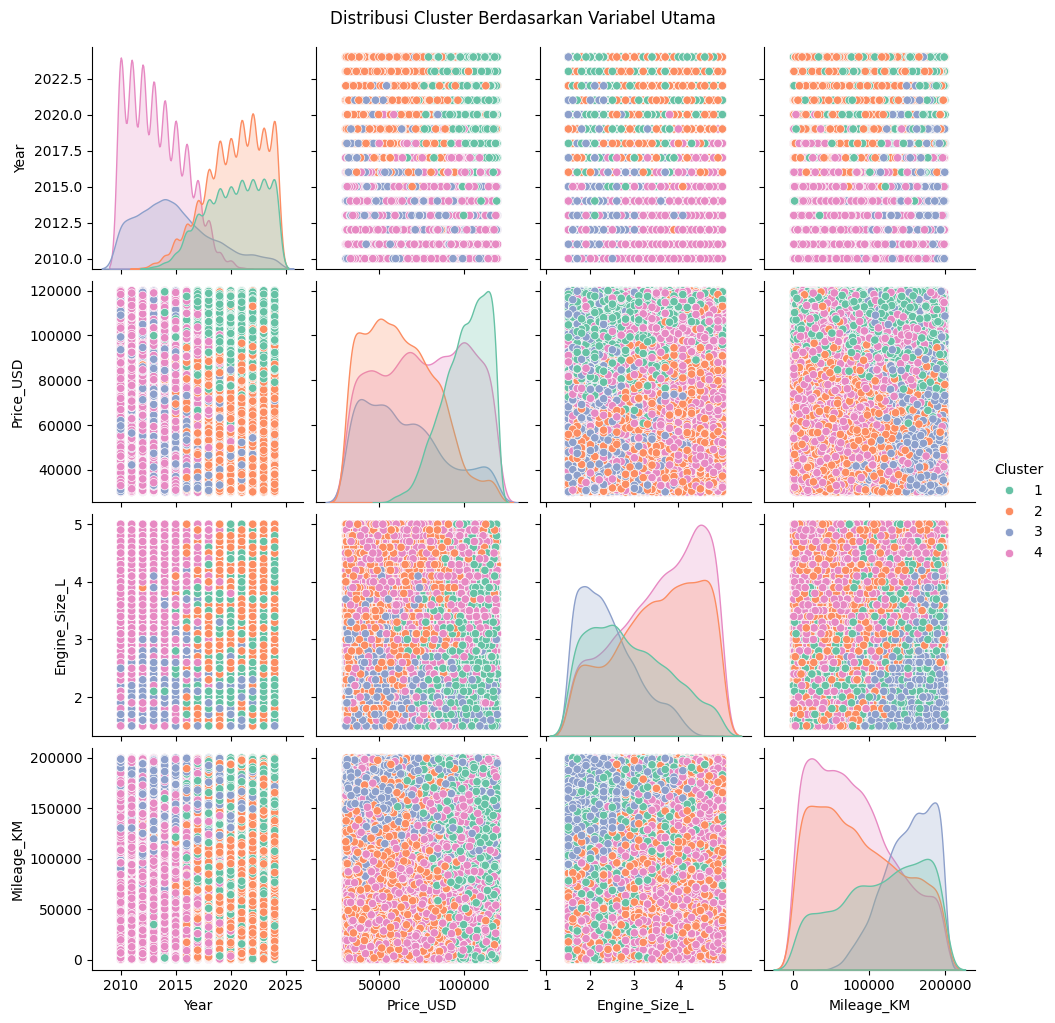

C:\Users\akbar\AppData\Local\Temp\ipykernel_25448\1432573801.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Price_USD', data=data_cluster, palette='Set2')


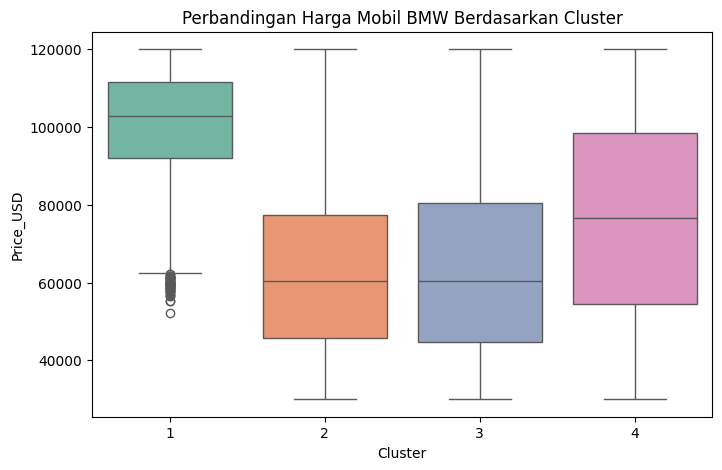

In [10]:
# Pairplot untuk melihat sebaran data antar cluster
sns.pairplot(data_cluster, hue='Cluster', diag_kind='kde', palette='Set2')
plt.suptitle("Distribusi Cluster Berdasarkan Variabel Utama", y=1.02)
plt.show()

# Boxplot harga per cluster
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cluster', y='Price_USD', data=data_cluster, palette='Set2')
plt.title("Perbandingan Harga Mobil BMW Berdasarkan Cluster")
plt.show()


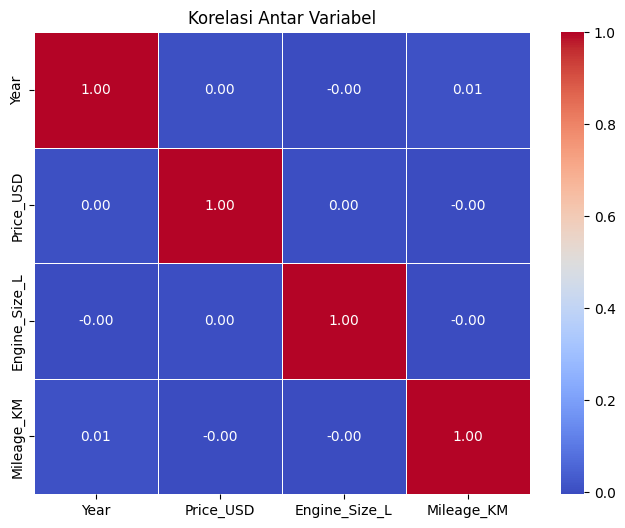

In [11]:
# Korelasi antar variabel numerik
corr = data_cluster[['Year', 'Price_USD', 'Engine_Size_L', 'Mileage_KM']].corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Korelasi Antar Variabel")
plt.show()


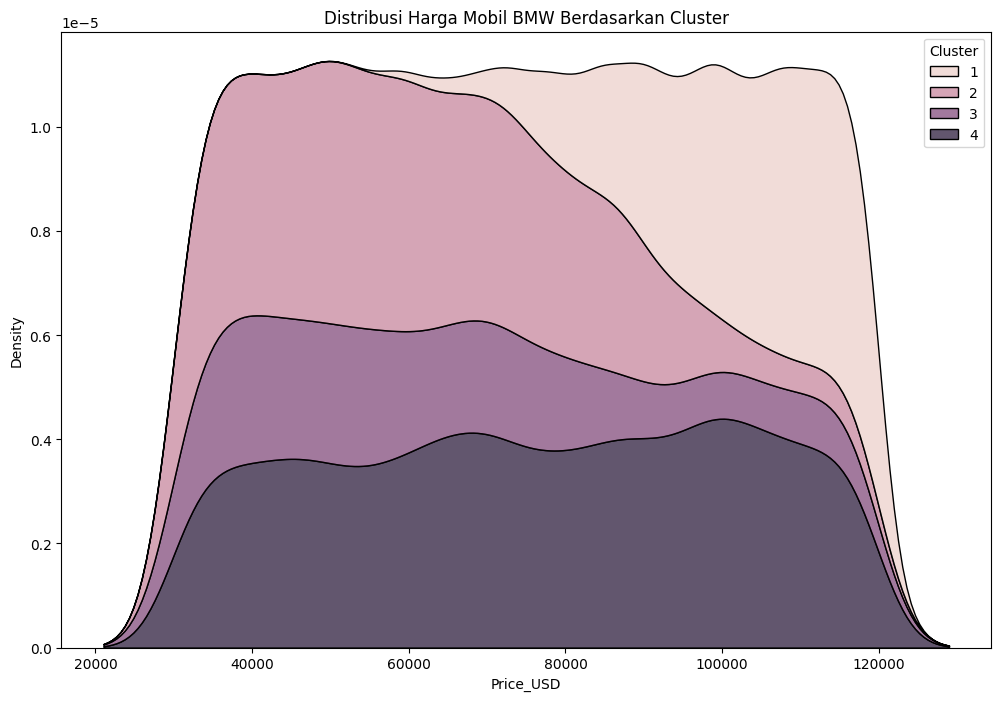

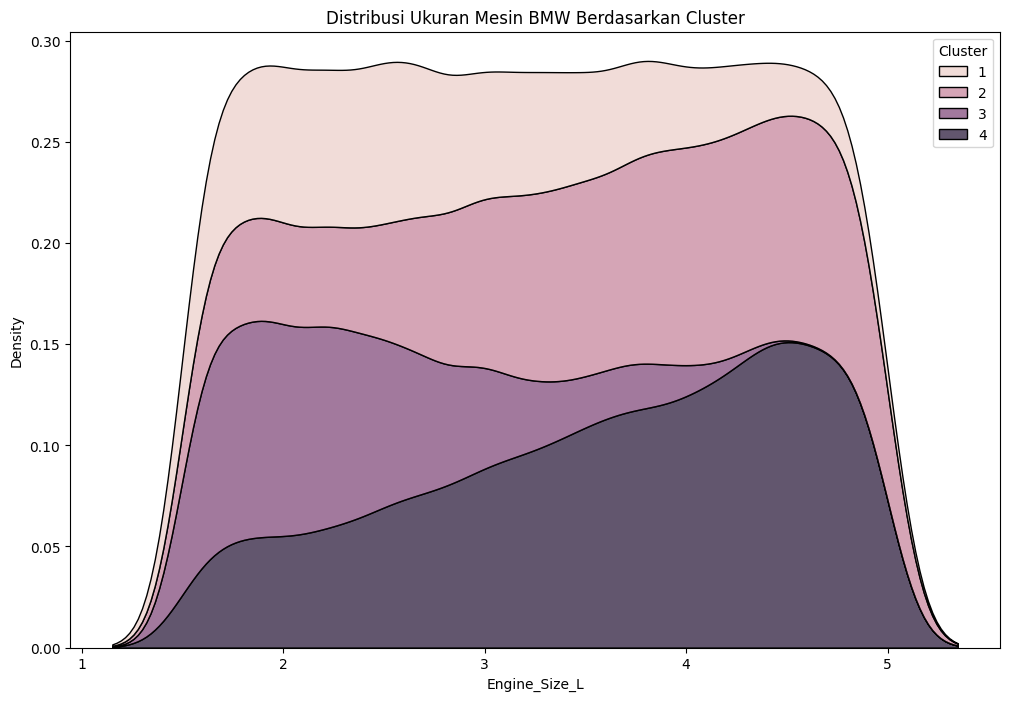

In [12]:
# Visualisasi distribusi untuk setiap cluster
plt.figure(figsize=(12, 8))
sns.kdeplot(data=data_cluster, x='Price_USD', hue='Cluster', multiple='stack')
plt.title("Distribusi Harga Mobil BMW Berdasarkan Cluster")
plt.show()

plt.figure(figsize=(12, 8))
sns.kdeplot(data=data_cluster, x='Engine_Size_L', hue='Cluster', multiple='stack')
plt.title("Distribusi Ukuran Mesin BMW Berdasarkan Cluster")
plt.show()


In [13]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score untuk hasil clustering
score = silhouette_score(scaled_df, data_cluster['Cluster'])
print(f"Silhouette Score: {score:.3f}")



Silhouette Score: 0.125
